In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\klsis\anaconda3\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
!pip install pyforest
from pyforest import*

lazy_imports()

['import statistics',
 'from sklearn.manifold import TSNE',
 'import datetime as dt',
 'import altair as alt',
 'from sklearn import svm',
 'import os',
 'import plotly.express as px',
 'import xgboost as xgb',
 'import numpy as np',
 'import glob',
 'import tensorflow as tf',
 'import gensim',
 'import awswrangler as wr',
 'from sklearn.model_selection import train_test_split',
 'import dash',
 'import seaborn as sns',
 'import tqdm',
 'import bokeh',
 'import sklearn',
 'import pickle',
 'from dask import dataframe as dd',
 'import keras',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'from pathlib import Path',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'from pyspark import SparkContext',
 'from sklearn.ensemble import RandomForestRegressor',
 'import plotly.graph_objs as go',
 'from sklearn.preprocessing import OneHotEncoder',
 'import re',
 'import pydot',
 'import matplotlib as mpl',
 

# Read the CSV and Perform Basic Data Cleaning

In [28]:
df = pd.read_csv("breast_cancer.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

<IPython.core.display.Javascript object>

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [29]:
df.columns[1:12]

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

In [30]:
df = df[df.columns[1:12]]
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [31]:
#Get Datatypes of each column in our dataset
df.dtypes

diagnosis                  object
radius_mean               float64
texture_mean              float64
perimeter_mean            float64
area_mean                 float64
smoothness_mean           float64
compactness_mean          float64
concavity_mean            float64
concave_points_mean       float64
symmetry_mean             float64
fractal_dimension_mean    float64
dtype: object

In [32]:
#Encode the diagnosis values
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df.iloc[:,0]=labelencoder.fit_transform(df.iloc[:,0].values)

In [33]:
# Display df
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [34]:
# Check datatypes again
df.dtypes

diagnosis                   int32
radius_mean               float64
texture_mean              float64
perimeter_mean            float64
area_mean                 float64
smoothness_mean           float64
compactness_mean          float64
concavity_mean            float64
concave_points_mean       float64
symmetry_mean             float64
fractal_dimension_mean    float64
dtype: object

# EXPLORATORY DATA ANALYSIS

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.00000,0.00000,0.00000,1.00000,1.00000
radius_mean,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.78000,28.11000
texture_mean,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.80000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.10000,188.50000
area_mean,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.70000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.10530,0.16340
compactness_mean,569.0,0.104341,0.052813,0.01938,0.06492,0.09263,0.13040,0.34540
concavity_mean,569.0,0.088799,0.079720,0.00000,0.02956,0.06154,0.13070,0.42680
concave_points_mean,569.0,0.048919,0.038803,0.00000,0.02031,0.03350,0.07400,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.10600,0.16190,0.17920,0.19570,0.30400


<IPython.core.display.Javascript object>

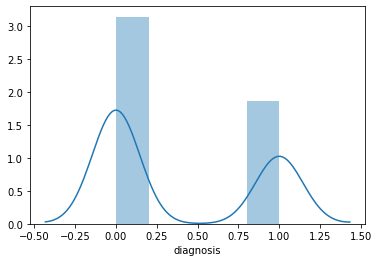

In [36]:
sns.distplot(df['diagnosis']);

In [37]:
#Splitting the dataset into independent and dependent datasets 
X=df.iloc[:,1:].values
y=df.iloc[:,0].values

# Create a Train Test Split

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [39]:
X_train

array([[1.289e+01, 1.312e+01, 8.189e+01, ..., 1.171e-02, 1.337e-01,
        5.581e-02],
       [1.340e+01, 2.052e+01, 8.864e+01, ..., 8.172e-02, 2.116e-01,
        7.325e-02],
       [1.296e+01, 1.829e+01, 8.418e+01, ..., 1.883e-02, 1.874e-01,
        5.899e-02],
       ...,
       [1.429e+01, 1.682e+01, 9.030e+01, ..., 6.250e-03, 1.508e-01,
        5.376e-02],
       [1.398e+01, 1.962e+01, 9.112e+01, ..., 6.463e-02, 1.669e-01,
        6.544e-02],
       [1.218e+01, 2.052e+01, 7.722e+01, ..., 1.770e-02, 1.739e-01,
        5.677e-02]])

# Pre-processing

In [40]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler model and fit it to the training data
X_minmax = MinMaxScaler().fit(X_train)

# Transform the training and testing data using the X_scaler and y_scaler models
X_train_minmax = X_minmax.transform(X_train)
X_test_minmax = X_minmax.transform(X_test)

# Train the Model

In [41]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8951048951048951

In [ ]:
import graphviz
dot_data =tree.export_graphviz(
    clf, out_file = None,
    feature_names = ['clump_thickness', 'size_uniformity', 'shape_uniformity',
       'marginal_adhesion', 'epithelial_size', 'bare_nucleoli_1', 'bare_nucleoli_10',
        'bare_nucleoli_2', 'bare_nucleoli_3', 'bare_nucleoli_4', 'bare_nucleoli_5',
        'bare_nucleoli_6', 'bare_nucleoli_7', 'bare_nucleoli_8', 'bare_nucleoli_9',
       'bare_nucleoli_?', 'bland_chromatin', 'normal_nucleoli', 'mitoses'],
    class_names = ["Benign", "Malignant"],
    filled = True, rounded = True,
    special_characters = True)

In [ ]:
import pydotplus
graph = pydotplus.graphviz.graph_from_dot_data(dot_data)
img = graphviz.Source(dot_data)
img

In [ ]:
# Export to pdf files
graph.write_pdf("tree.pdf")

In [ ]:
# Image
graph.write_png('tree.png')